read an image and plot the histogram of an image

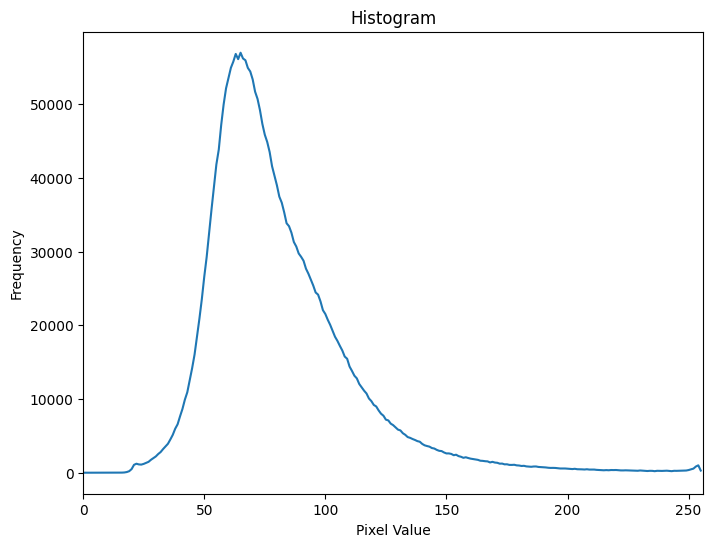

In [1]:
import cv2
import matplotlib.pyplot as plt

def plot_histogram(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not open or find the image.")
        return

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.plot(histogram)
    plt.xlim([0, 256])
    plt.show()

if __name__ == "__main__":
    image_path = '/content/a_beautiful_reflection_of_trees.jpg'  # Replace with the path to your image file
    plot_histogram(image_path)


implement the gradient descent algorithm

m 0.0568, b 0.016, iteration 0 , cost 92.80000000000001
m 0.1122544, b 0.0316272, iteration 1 , cost 89.35895744
m 0.16639504, b 0.0468904192, iteration 2 , cost 86.07882846745088
m 0.21925300660480002, b 0.0617982681216, iteration 3 , cost 82.9520881339858
m 0.2708586508507648, b 0.076359153545728, iteration 4 , cost 79.97156338733407
m 0.32124160561077364, b 0.09058128333353196, iteration 5 , cost 77.13041661527981
m 0.3704308025873354, b 0.10447267113320026, iteration 6 , cost 74.42212995916927
m 0.4184544889036148, b 0.11804114097540985, iteration 7 , cost 71.84049036098021
m 0.46534024330188284, b 0.13129433176003735, iteration 8 , cost 69.37957530964913
m 0.5111149919586812, b 0.144239701636706, iteration 9 , cost 67.03373925395583


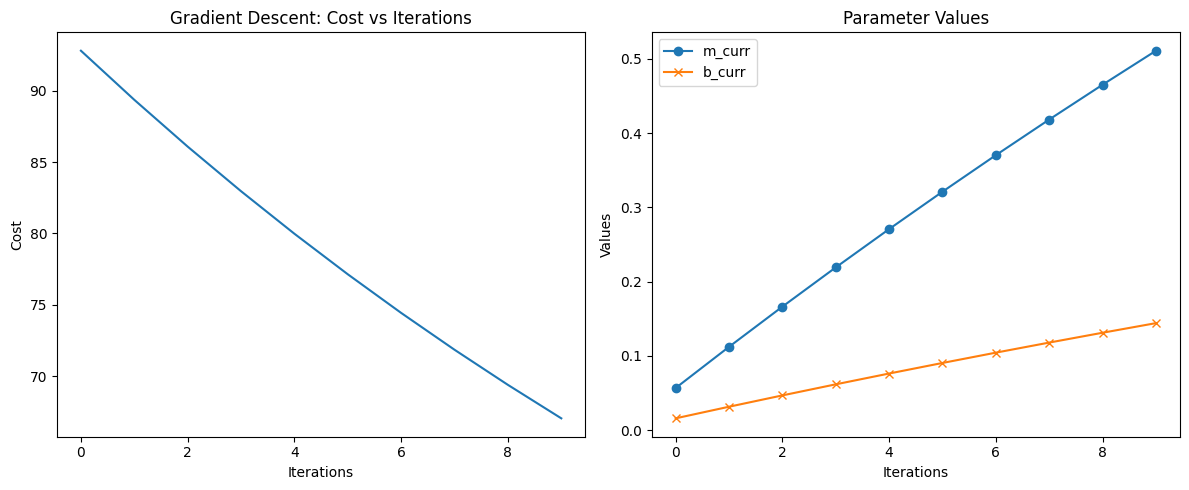

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.001
    costs = []  # To store the cost values for plotting
    m_values = []  # To store the m_curr values for plotting
    b_values = []  # To store the b_curr values for plotting

    for i in range(iterations):
        y_pred = m_curr * x + b_curr
        cost = (1 / n) * sum([val ** 2 for val in (y - y_pred)])
        md = -(2 / n) * sum(x * (y - y_pred))
        bd = -(2 / n) * sum(y - y_pred)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        costs.append(cost)  # Append cost to the list
        m_values.append(m_curr)  # Append m_curr to the list
        b_values.append(b_curr)  # Append b_curr to the list

        print("m {}, b {}, iteration {} , cost {}".format(m_curr, b_curr, i, cost))

    # Plot the cost values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Gradient Descent: Cost vs Iterations')

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), m_values, label='m_curr', marker='o')
    plt.plot(range(iterations), b_values, label='b_curr', marker='x')
    plt.xlabel('Iterations')
    plt.ylabel('Values')
    plt.title('Parameter Values')
    plt.legend()

    plt.tight_layout()
    plt.show()

x = np.array([1, 2, 3, 4, 5])
y = np.array([6, 8, 2, 6, 18])

gradient_descent(x, y)

Read an excel file and compute the mean for each of the columns and find the variance across the columns

In [3]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual file path
file_path = '/content/TEST3_Q6.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Calculate the mean for each column
means = df.mean()

# Calculate the variance for each column
variances = df.var()

# Display the mean and variance for each column
for column_name, mean_value, variance_value in zip(means.index, means, variances):
    print(f"Column: {column_name}")
    print(f"Mean: {mean_value}")
    print(f"Variance: {variance_value}")
    print("-------------------------")

Column: Age
Mean: 26.25
Variance: 12.25
-------------------------
Column: Height
Mean: 167.5
Variance: 141.66666666666666
-------------------------


<ipython-input-3-efa52cf4b490>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean()
<ipython-input-3-efa52cf4b490>:13: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var()


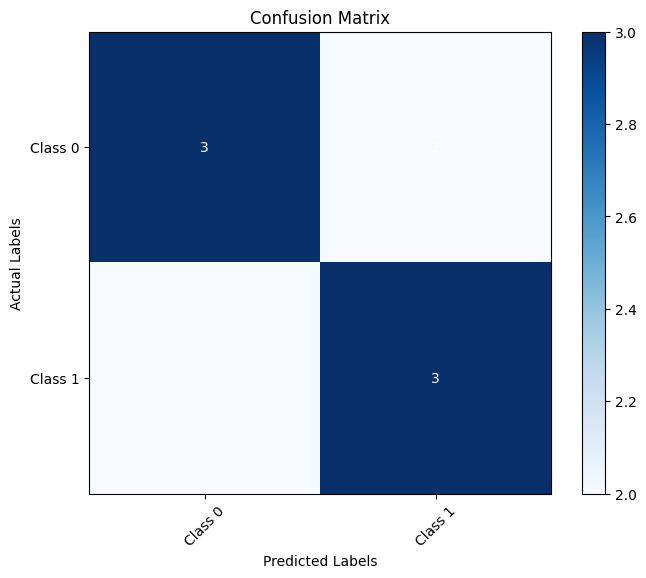

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Example ground truth (actual) and predicted labels
actual_labels = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
predicted_labels = [0, 1, 0, 0, 1, 1, 0, 1, 0, 1]

# Compute confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Define class labels
class_labels = ["Class 0", "Class 1"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Fill in the cells with count values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')

plt.show()
